$Step-1$:

**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

$Step-2$:

**Read the data**

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

$Step-3$

**Make a dataframe from raw data**

sklearn.datasets has given data and target sepeartely

before we worked on Visa dataset, Loan prediction

we need to make a dataframe

In [5]:
import pandas as pd
input_data=housing.data   # housing['data']
column_name=housing.feature_names  # housing['feature_names']
housing_data=pd.DataFrame(housing.data,
                          columns=housing.feature_names)
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
housing_data['MedHouseVal']=housing.target

In [7]:
housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


$Step-4$

**Analyse the target column**

C:\Users\muzaf\AppData\Local\Temp\ipykernel_1880\2543194919.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data['MedHouseVal'],bins=50)


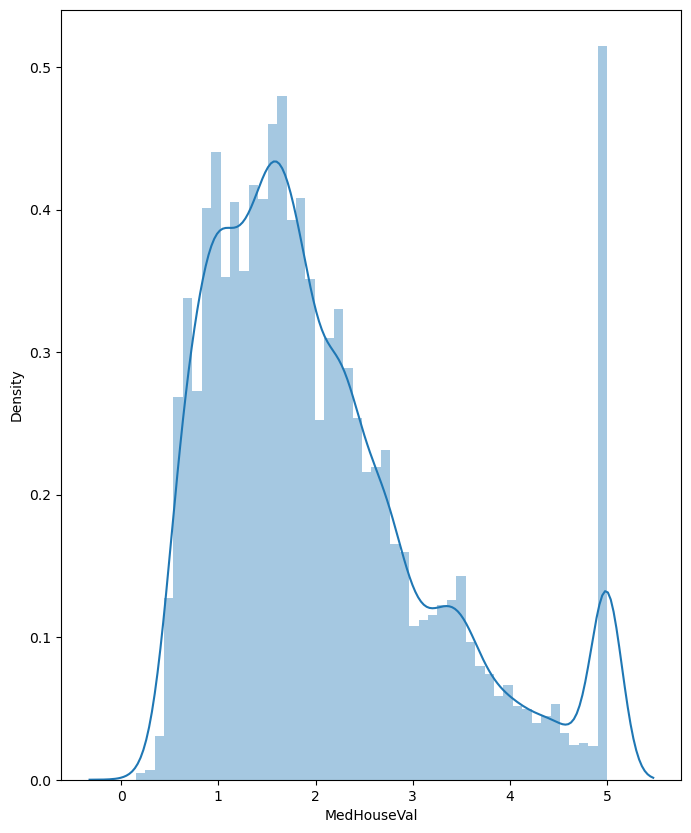

In [8]:
import seaborn as sns
plt.figure(figsize=(8,10))
sns.distplot(housing_data['MedHouseVal'],bins=50)
plt.show()

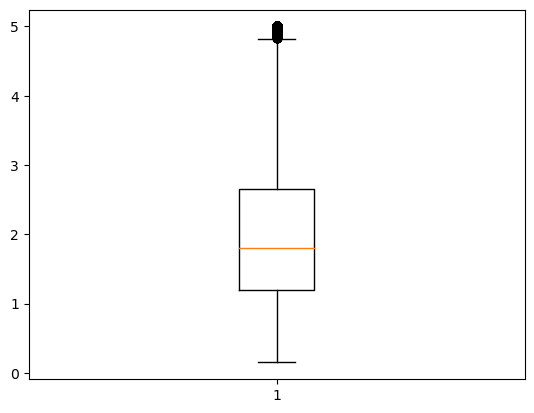

In [9]:
plt.boxplot(housing_data['MedHouseVal'])
plt.show()

In [10]:
# Impute the outliers with Median data

q1 = np.percentile(housing_data['MedHouseVal'],25)
q3 = np.percentile(housing_data['MedHouseVal'],75)
IQR= q3 - q1
lb = q1-1.5*IQR
ub = q3+1.5*IQR
housing_data['MedHouseVal']=np.where(housing_data['MedHouseVal']<lb,
                                     housing_data['MedHouseVal'].median(),
                                     housing_data['MedHouseVal'])

housing_data['MedHouseVal']=np.where(housing_data['MedHouseVal']>ub,
                                     housing_data['MedHouseVal'].median(),
                                     housing_data['MedHouseVal'])

C:\Users\muzaf\AppData\Local\Temp\ipykernel_1880\2543194919.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data['MedHouseVal'],bins=50)


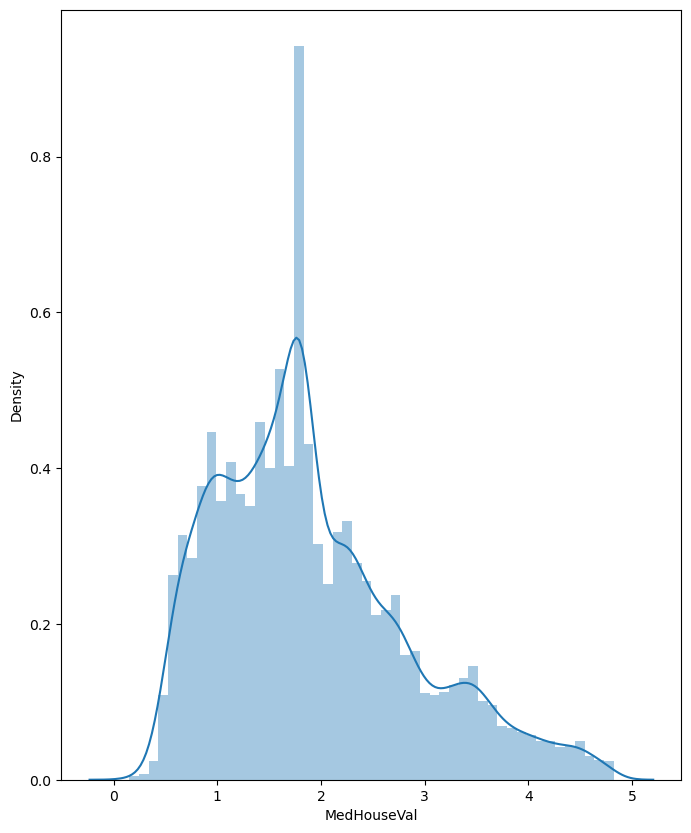

In [11]:
import seaborn as sns
plt.figure(figsize=(8,10))
sns.distplot(housing_data['MedHouseVal'],bins=50)
plt.show()

$Step-5$:

**Correlation**

- Pearson correlation coefficient

- It is denoted with r

- r varies from -1 to 1

- -1  to 0   :  negative correlation

- 0 to 1 : postive correlation

- 0: No correlation independent each other

   Cov(X,Y)/ std(x) *std(y)

In [12]:
housing_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.501971
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.056833
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.094427
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.057851
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.019221
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.020644
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144964
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045740
MedHouseVal,0.501971,0.056833,0.094427,-0.057851,0.019221,-0.020644,-0.144964,-0.045740,1.000000


<Axes: >

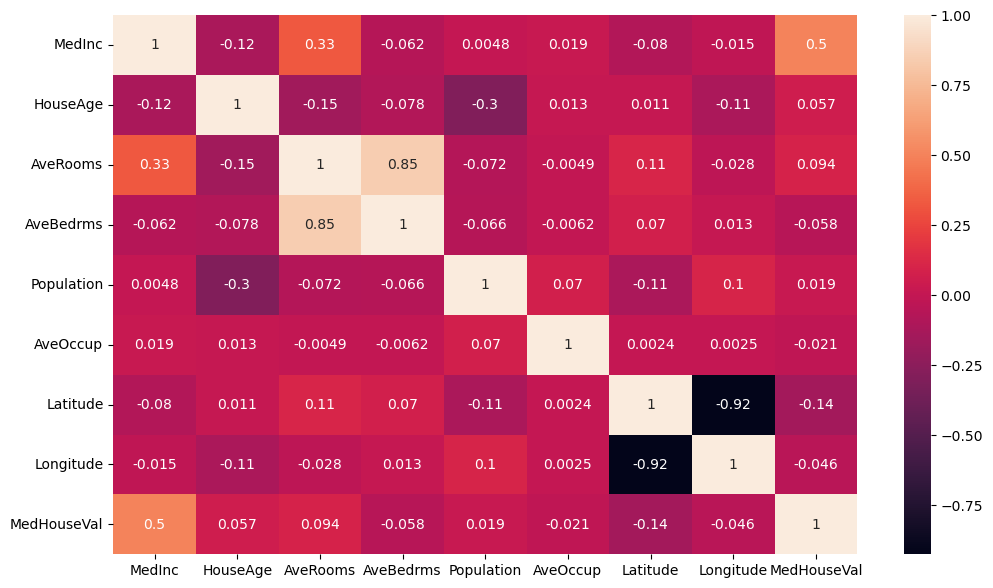

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(housing_data.corr(),annot=True)

In [14]:
pd.DataFrame(housing_data.corr().round(2)['MedHouseVal'].\
             drop('MedHouseVal')).\
             sort_values(by='MedHouseVal')


pd.DataFrame(housing_data.corr().round(2)['MedHouseVal'].drop('MedHouseVal')).sort_values(by='MedHouseVal')

,MedHouseVal
Latitude,-0.14
AveBedrms,-0.06
Longitude,-0.05
AveOccup,-0.02
Population,0.02
HouseAge,0.06
AveRooms,0.09
MedInc,0.50


In [15]:
pd.DataFrame(housing_data.corr().round(2)['MedHouseVal'].\
             drop('MedHouseVal')).\
             sort_values(by='MedHouseVal')

,MedHouseVal
Latitude,-0.14
AveBedrms,-0.06
Longitude,-0.05
AveOccup,-0.02
Population,0.02
HouseAge,0.06
AveRooms,0.09
MedInc,0.50


$Step-6$

- Before start any ML algorithm

- we need to seperate input data and target data

In [16]:
housing_data.columns

# If you want to seperate input data
# either you can select all the input columns
# or you can simply drop the target column

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [17]:
# createing a input data
X= housing_data.drop('MedHouseVal',axis=1)    # do not write inplace=True
# creating a output data
y= housing_data['MedHouseVal']

$Step-7$:

**Divide data into train data and test data**

- train_test_split

- This method will take input data (X) and target_data  y

- This method also will take how much percentage we need to divide data

- This method also take random state: data divides randomly

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,y,
                                                test_size=0.2, # 80:20
                                                random_state=1234)

In [19]:
print(housing_data.shape)

20640*20/100

# 4128 observations are test data
# 16512 observations are train data
#20640-4128
# Total columns are 9= input(8) + target(1)

#X_train= (16512,8), X_test=(4128,8)
#Y_train=(16512,)  , Y_test=(4128,)

(20640, 9)


4128.0

In [20]:
print(X_train.shape),print(X_test.shape),print(Y_train.shape),print(Y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


(None, None, None, None)

$Step-8$

**Apply ML model**

- Import package : Model name

- Read the pacakge

- fit the model on train data

- Ml model develop on train data (X_train and Y_train)

In [21]:
from sklearn.linear_model import LinearRegression

# Step-1: import the package
# step-2: save the package
# step-3: apply fit transform

linear_model= LinearRegression()
# fit the model/ model creation based on train data
linear_model.fit(X_train,Y_train)

LinearRegression()

Y= bo+b1*x1+b2*x2+ b3*x3+ ..... +b8*x8

How many coeffients: 8(b1,b2,...b8)

How many intercept : 1(bo)

In [22]:
linear_model.coef_

array([ 1.95411404e-01,  1.21921388e-03,  9.71952147e-03,  7.31311066e-02,
        1.40334856e-05, -2.32616269e-03, -4.54795976e-01, -4.66427226e-01])

In [23]:
linear_model.intercept_

-38.59990671278714

$Step-9$:

**Predictions**

- Model development will happen using X_train and Y_train

- Predictions happnes only on X_test data

- The output we called y_predictions

- Finally we compare y_predictions with Y_test

- So that we can get the model perfomanace

In [24]:
y_test_predictions= linear_model.predict(X_test)
y_test_predictions

array([2.23606134, 2.30816604, 2.26297435, ..., 0.92288657, 2.15161111,
       1.44124852])

In [25]:
Y_test.values[:5]

array([1.797, 2.939, 4.125, 1.576, 3.041])

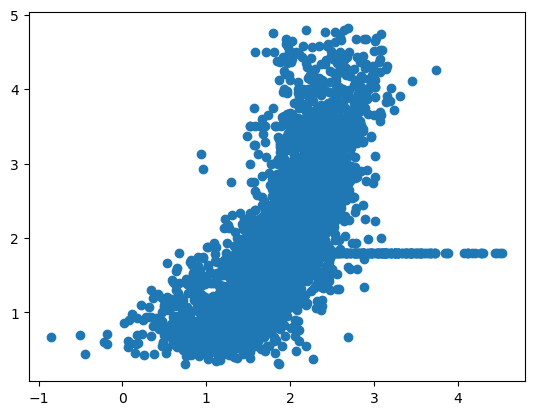

In [26]:
plt.scatter(y_test_predictions,Y_test.values)

$Step-10$

**Get the P-value analysis**


H0: There is no relation between independent and target varaible

     b1=b2=b3=.....=bn=0


H1: There is a relation

    b1!=b2!=......=0

In [27]:
from statsmodels.api import OLS
OLS(Y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                          1.323e+04
Date:                Fri, 01 Sep 2023   Prob (F-statistic):                        0.00
Time:                        10:04:49   Log-Likelihood:                         -19280.
No. Observations:               16512   AIC:                                  3.858e+04
Df Residuals:                   16504   BIC:                                  3.864e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.2794      0.005     58.168      0.000       0.270       0.289
HouseAge       0.0076      0.001     14.691      0.000       0.007       0.009
AveRooms      -0.0772      0.007    -10.997      0.000      -0.091      -0.063
AveBedrms      0.3161      0.033      9.629      0.000       0.252       0.380
Population  2.611e-05   5.74e-06      4.550      0.000    1.49e-05    3.74e-05
AveOccup      -0.0029      0.001     -5.086      0.000      -0.004      -0.002
Latitude      -0.0806      0.004    -20.052      0.000      -0.088      -0.073
Longitude     -0.0294      0.001    -23.111      0.000      -0.032      -0.027
==============================================================================
Omnibus:                     1253.616   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2301.991
Skew:                           0.546   Prob(JB):                         0.00
Kurtosis:                       4.467   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
linear_model.coef_

array([ 1.95411404e-01,  1.21921388e-03,  9.71952147e-03,  7.31311066e-02,
        1.40334856e-05, -2.32616269e-03, -4.54795976e-01, -4.66427226e-01])

$Step-11$

**Metrics**


- Mean square Error

- RMSE

- R-square

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_test,y_test_predictions)
rmse=np.sqrt(mse)
r_square= r2_score(Y_test,y_test_predictions)
print("MSE:",mse)
print('RMSE:',rmse)
print("R_Square:",r_square)

MSE: 0.5102664009872743
RMSE: 0.7143293365019208
R_Square: 0.4081516777216577


In [30]:
#plt.scatter(X_train.values,Y_train.values,color='g')
#plt.plot(X_test, y_test_predictions,color='k')

ValueError: x and y must be the same size

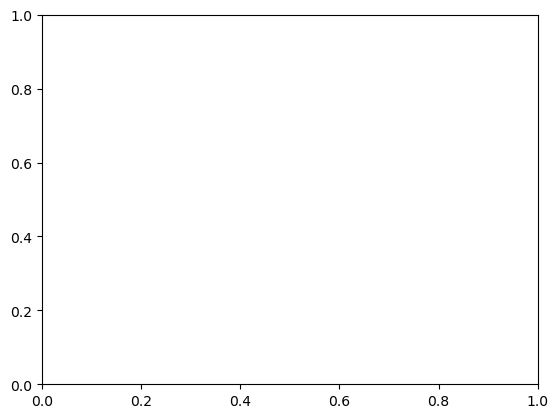

In [31]:
plt.scatter(X_train, Y_train, color = 'red')

$Step-12$

**Save the model**

In [ ]:
import pickle
pickle.dump(linear_model,
            open('C:\Users\muzaf\Documents\Linear_Regression\model.pkl','wb'))

$Step-13$

**Load the model**

In [ ]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

In [ ]:
# input data has 8 columns
# one sample: [1,2,3,4,5,6,7,8]
model.predict([[1,2,3,4,5,6,7,8]])